### This cell is used to maximize the width of the cells in the notebook, not a neccesity to use, I just prefer it

In [86]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% ! important; }<style>"))

/var/folders/jn/wfpqyzfx0t7cprw54pg29r1h0000gn/T/ipykernel_44467/2348643420.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [87]:
import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import numpy as np 
import ezc3d
import os
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns
from scipy.signal import butter, filtfilt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score




First, I want to import the metadata to organize the c3d filenames in order of velocity

In [88]:
#import the metadata file from my local location
meta = pd.read_csv("/Volumes/Emilio's Ex/code/Data/OpenBiomechanicsProject/openbiomechanics/baseball_pitching/data/metadata.csv")

#sort by descending velocity and reorganize the columns 
#for this I do not care much about anything aside from velocity and the c3d filename
#so I am organizing it this way as personal preference
new_column_order = ['pitch_speed_mph','session_pitch','filename_new', 'modelname_new','user', 'session', 'session_mass_kg',
             'session_height_m', 'age_yrs', 'playing_level']

meta_organized = (meta[new_column_order]
                  .sort_values(by = 'pitch_speed_mph', ascending = False))



In [89]:
#call the variable to view all the pitches
meta_organized

,pitch_speed_mph,session_pitch,filename_new,modelname_new,user,session,session_mass_kg,session_height_m,age_yrs,playing_level
239,94.4,2916_4,001596_002916_73_191_012_FF_944.c3d,001596_002916_model.c3d,1596,2916,86.6376,1.8542,20.26,college
238,94.2,2916_3,001596_002916_73_191_011_FF_942.c3d,001596_002916_model.c3d,1596,2916,86.6376,1.8542,20.26,college
240,94.0,2916_5,001596_002916_73_191_013_FF_940.c3d,001596_002916_model.c3d,1596,2916,86.6376,1.8542,20.26,college
236,93.5,2916_1,001596_002916_73_191_008_FF_935.c3d,001596_002916_model.c3d,1596,2916,86.6376,1.8542,20.26,college
266,93.1,2935_2,001621_002935_78_200_003_FF_931.c3d,001621_002935_model.c3d,1621,2935,90.7200,1.9812,20.97,college
63,93.1,1688_1,000511_001688_78_235_003_FF_931.c3d,000511_001688_model.c3d,511,1688,106.5960,1.9812,22.26,independent
237,93.0,2916_2,001596_002916_73_191_010_FF_930.c3d,001596_002916_model.c3d,1596,2916,86.6376,1.8542,20.26,college
267,92.8,2935_3,001621_002935_78_200_005_FF_928.c3d,001621_002935_model.c3d,1621,2935,90.7200,1.9812,20.97,college
268,92.6,2935_4,001621_002935_78_200_006_FF_926.c3d,001621_002935_model.c3d,1621,2935,90.7200,1.9812,20.97,college
357,92.4,3132_1,001002_003132_72_216_001_FF_924.c3d,001002_003132_model.c3d,1002,3132,97.9776,1.8288,25.07,college


This may not be the most efficient way of doing things, but I am going to use the pitch_speed_mph and session_pitch columns to allow me to choose a specific pitch, then the 'user' and 'filename_new' columns will house the identifiers I can use in my path to pull that specific throw's c3d file.

In [90]:
#enter pitch velocity and session pitch to get the value in the 'user' column 
#you need two identifiers due to multiple pitches potentially having the same velocities
#pitch_speed_mph: int , session_pitch: str  

conditions = meta_organized[(meta_organized['pitch_speed_mph'] == 88.6) & (meta_organized['session_pitch'] == '2860_2')]

#check if df is empty, if it is not, we will have our c3d path

if not conditions.empty:
    user = conditions['user'].iloc[0]
    pitch = conditions['session_pitch'].iloc[0]
    velo = conditions['pitch_speed_mph'].iloc[0]
    filename = conditions['filename_new'].iloc[0]
    #use the user output in the path to find the c3d associated with the pitch
    #adding :06 to the user variable makes sure it is 6 digits long as the file name requirements
    c3d_path = f"/Volumes/Emilio's Ex/code/Data/OpenBiomechanicsProject/openbiomechanics/baseball_pitching/data/c3d/{user:06}/{filename}"
else:
    print("No data found matching the criteria.")


Now, you just have to put the 'c3d_path' variable in this call to get the c3d of the specific pitch you want

In [91]:
#import c3d
c = ezc3d.c3d(c3d_path)

## We are going to find the forces in this step

In [92]:
#c3d files usually contain labels for each analog channel. 
#look at the labels to determine which channels correspond to the force component
labels = c['parameters']['ANALOG']['LABELS']['value']
print(labels)

['Fx1', 'Fy1', 'Fz1', 'Mx1', 'My1', 'Mz1', 'Fx2', 'Fy2', 'Fz2', 'Mx2', 'My2', 'Mz2', 'Fx3', 'Fy3', 'Fz3', 'Mx3', 'My3', 'Mz3']


In [93]:
#force plate data will be housed in the ['data'] and ['analogs'] keys
force_data = c['data']['analogs']

force_data.shape #there are 18 channels of analog data recorded over 1218 frames

(1, 18, 2157)

In [94]:
#function to extract force data for a given force plate number
#1 = 3b side landing force plate
#2 = pitching rubber force plate
#3 = 1b side landing force plate

def get_force_data(c, plate_number):
    fx_label = f'Fx{plate_number}'
    fy_label = f'Fy{plate_number}'
    fz_label = f'Fz{plate_number}'

    fx_index = labels.index(fx_label)
    fy_index = labels.index(fy_label)
    fz_index = labels.index(fz_label)

    fx_data = c['data']['analogs'][0, fx_index, :]
    fy_data = c['data']['analogs'][0, fy_index, :]
    fz_data = c['data']['analogs'][0, fz_index, :]

    return fx_data, fy_data, fz_data

In [95]:
# force data for each force plate
force_data_plate1 = get_force_data(c, 1)
force_data_plate2 = get_force_data(c, 2)
force_data_plate3 = get_force_data(c, 3)

In [96]:
#find the frame rate 
c['header']['points']['frame_rate']

360.0

In [97]:
#import the landmark data, this will be used to mark events in out plot (and maybe subsequent analysis)
poi = pd.read_csv("/Volumes/Emilio's Ex/code/Data/OpenBiomechanicsProject/openbiomechanics/baseball_pitching/data/full_sig/landmarks.csv")

#filter the df based on the 'pitch' variable we stored earlier
filtered_poi = poi[poi['session_pitch']== pitch]

#get the event times - have to multiply by three to match the timing of the fp measurements - 1080Hz vs 360Hz
pkh_time = filtered_poi['pkh_time'].values[0] * 3 
fp_10_time = filtered_poi['fp_10_time'].values[0]  * 3 
fp_100_time = filtered_poi['fp_100_time'].values[0] * 3 
MER_time = filtered_poi['MER_time'].values[0] * 3 
BR_time = filtered_poi['BR_time'].values[0] * 3 
MIR_time = filtered_poi['MIR_time'].values[0] * 3 

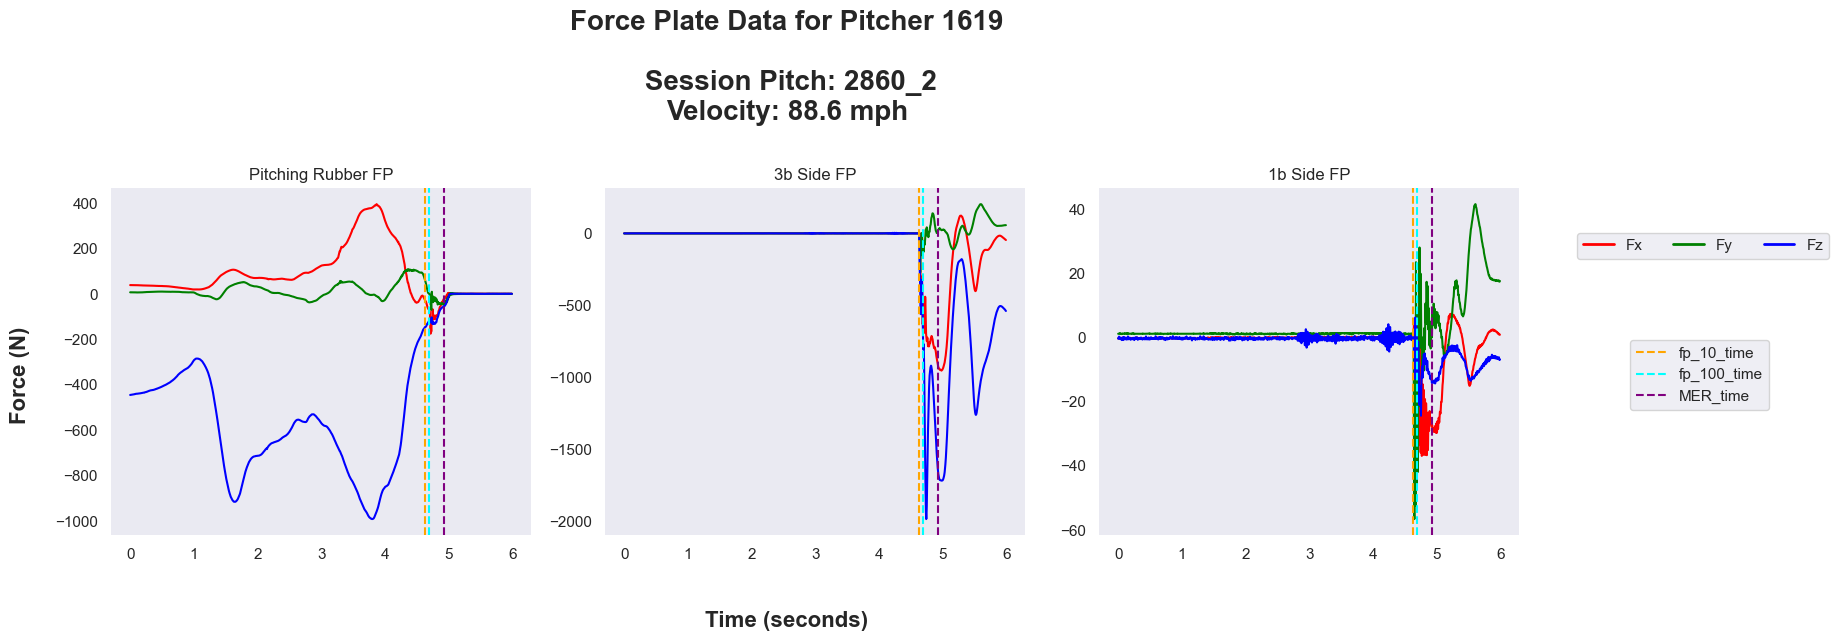

In [98]:
frame_rate = 360  # frames per second
num_frames = len(force_data_plate1[0])
time = np.arange(num_frames) / frame_rate

sns.set(style='dark')

#lines for forces
custom_lines = [Line2D([0], [0], color='red', lw=2),
                Line2D([0], [0], color='green', lw=2),
                Line2D([0], [0], color='blue', lw=2)]
#lines for events
event_lines = [Line2D([0], [0], color='orange', linestyle='--'),
               Line2D([0], [0], color='cyan', linestyle='--'),
               Line2D([0], [0], color='purple', linestyle='--')]# Line2D([0], [0], color='pink', linestyle='--'), Line2D([0], [0], color='magenta', linestyle='--'), Line2D([0], [0], color='yellow', linestyle='--')

event_labels = ['fp_10_time', 'fp_100_time', 'MER_time'] # 'pkh_time', 'BR_time', 'MIR_time'


fig, axs = plt.subplots(1, 3, figsize=(15, 5))


#Plate 2
axs[0].plot(time, force_data_plate2[0], color='red')
axs[0].plot(time, force_data_plate2[1], color='green')
axs[0].plot(time, force_data_plate2[2], color='blue')
axs[0].title.set_text('Pitching Rubber FP')
axs[0].spines['top'].set_visible(False)
axs[0].spines['right'].set_visible(False)
axs[0].spines['bottom'].set_visible(False)
axs[0].spines['left'].set_visible(False)
#axs[0].axvline(x=pkh_time, color='pink', linestyle='--', label='pkh_time')
axs[0].axvline(x=fp_10_time, color='orange', linestyle='--', label='fp_10_time')
axs[0].axvline(x=fp_100_time, color='cyan', linestyle='--', label='fp_100_time')
axs[0].axvline(x=MER_time, color='purple', linestyle='--', label='MER_time')
#axs[0].axvline(x=BR_time, color='magenta', linestyle='--', label='BR_time')
#axs[0].axvline(x=MIR_time, color='yellow', linestyle='--', label='MIR_time')

#Plate 1
axs[1].plot(time, force_data_plate1[0], color='red')
axs[1].plot(time, force_data_plate1[1], color='green')
axs[1].plot(time, force_data_plate1[2], color='blue')
axs[1].title.set_text('3b Side FP')
axs[1].spines['top'].set_visible(False)
axs[1].spines['right'].set_visible(False)
axs[1].spines['bottom'].set_visible(False)
axs[1].spines['left'].set_visible(False)
#axs[1].axvline(x=pkh_time, color='pink', linestyle='--', label='pkh_time')
axs[1].axvline(x=fp_10_time, color='orange', linestyle='--', label='fp_10_time')
axs[1].axvline(x=fp_100_time, color='cyan', linestyle='--', label='fp_100_time')
axs[1].axvline(x=MER_time, color='purple', linestyle='--', label='MER_time')
#axs[1].axvline(x=BR_time, color='magenta', linestyle='--', label='BR_time')
#axs[1].axvline(x=MIR_time, color='yellow', linestyle='--', label='MIR_time')

#Plate 3
axs[2].plot(time, force_data_plate3[0], color='red')
axs[2].plot(time, force_data_plate3[1], color='green')
axs[2].plot(time, force_data_plate3[2], color='blue')
axs[2].title.set_text('1b Side FP')
axs[2].spines['top'].set_visible(False)
axs[2].spines['right'].set_visible(False)
axs[2].spines['bottom'].set_visible(False)
axs[2].spines['left'].set_visible(False)
#axs[2].axvline(x=pkh_time, color='pink', linestyle='--', label='pkh_time')
axs[2].axvline(x=fp_10_time, color='orange', linestyle='--', label='fp_10_time')
axs[2].axvline(x=fp_100_time, color='cyan', linestyle='--', label='fp_100_time')
axs[2].axvline(x=MER_time, color='purple', linestyle='--', label='MER_time')
#axs[2].axvline(x=BR_time, color='magenta', linestyle='--', label='BR_time')
#axs[2].axvline(x=MIR_time, color='yellow', linestyle='--', label='MIR_time')



# Adding a legend for forces and events (defined above)
fig.legend(custom_lines, ['Fx', 'Fy', 'Fz'], loc='upper right', bbox_to_anchor=(1.2,.8), ncol=3, labelspacing=0.5 )
fig.legend(event_lines, event_labels, loc='center right', bbox_to_anchor=(1.16, .5), ncol=1, labelspacing=0.5 )

# Adding one horizontal and one vertical label for the entire plot and one main title
fig.text(0.5, -0.004, 'Time (seconds)', ha='center',fontweight = 'bold', fontsize = 16) #horizontal label
fig.text(-0.018, 0.5, 'Force (N)', va='center',fontweight = 'bold', fontsize = 16, rotation='vertical') #vertical label

title_text = f'Force Plate Data for Pitcher {user}\n\n Session Pitch: {pitch}\nVelocity: {velo} mph'
fig.text(0.5, 1.01, title_text, ha='center',fontweight = 'bold', fontsize = 20)

plt.tight_layout(rect=[0, 0.09, 1, 0.95])
plt.show()


# A Butterworth low-pass filter is applied to the force plate data.

## The purpose of applying this filter is to remove high-frequency noise from the data without significantly distorting the signal of interest. 

### A cutoff frequency of 20Hz is chosen  because baseball pitching typically contains meaningful information below 20Hz.

In [99]:
def butter_lowpass_filter(data, cutoff, fs, order=5):
    nyq = 0.5 * fs  # Nyquist Frequency
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

# Filter settings
cutoff_frequency = 20  # 20 Hz
sampling_rate = 360    # Original sampling rate

filtered_force_data_plate1 = [butter_lowpass_filter(data, cutoff_frequency, sampling_rate) for data in force_data_plate1]
filtered_force_data_plate2 = [butter_lowpass_filter(data, cutoff_frequency, sampling_rate) for data in force_data_plate2]
filtered_force_data_plate3 = [butter_lowpass_filter(data, cutoff_frequency, sampling_rate) for data in force_data_plate3]



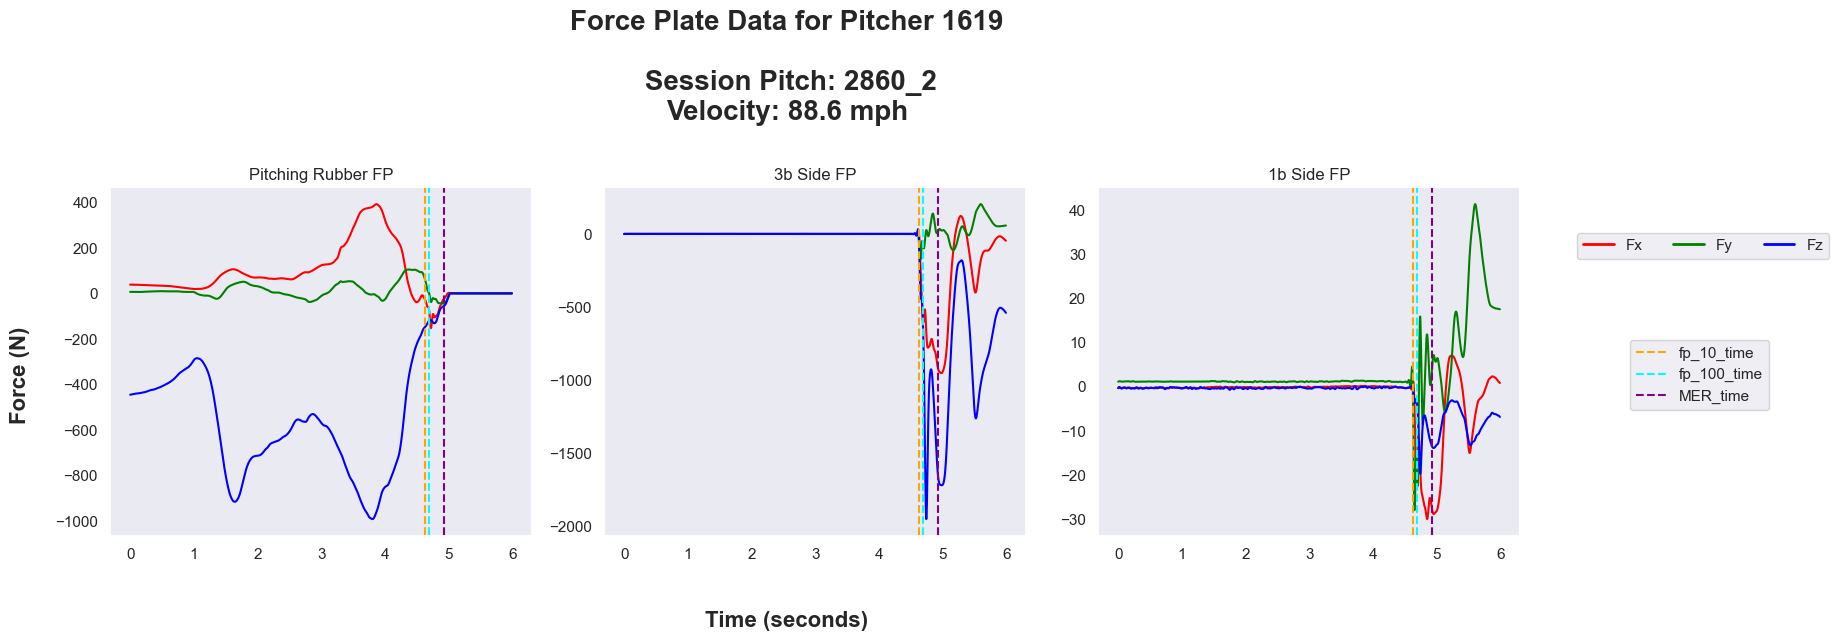

In [100]:

# Plotting
frame_rate = 360  # frames per second
num_frames = len(filtered_force_data_plate1[0])
time = np.arange(num_frames) / frame_rate

sns.set(style='dark')

# Lines for forces
custom_lines = [Line2D([0], [0], color='red', lw=2),
                Line2D([0], [0], color='green', lw=2),
                Line2D([0], [0], color='blue', lw=2)]

#lines for events
event_lines = [Line2D([0], [0], color='orange', linestyle='--'),
               Line2D([0], [0], color='cyan', linestyle='--'),
               Line2D([0], [0], color='purple', linestyle='--')]# Line2D([0], [0], color='pink', linestyle='--'), Line2D([0], [0], color='magenta', linestyle='--'), Line2D([0], [0], color='yellow', linestyle='--')

event_labels = ['fp_10_time', 'fp_100_time', 'MER_time'] # 'pkh_time', 'BR_time', 'MIR_time'


fig, axs = plt.subplots(1, 3, figsize=(15, 5))

#Plate 2
axs[0].plot(time, filtered_force_data_plate2[0], color='red')
axs[0].plot(time, filtered_force_data_plate2[1], color='green')
axs[0].plot(time, filtered_force_data_plate2[2], color='blue')
axs[0].title.set_text('Pitching Rubber FP')
axs[0].spines['top'].set_visible(False)
axs[0].spines['right'].set_visible(False)
axs[0].spines['bottom'].set_visible(False)
axs[0].spines['left'].set_visible(False)
#axs[0].axvline(x=pkh_time, color='pink', linestyle='--', label='pkh_time')
axs[0].axvline(x=fp_10_time, color='orange', linestyle='--', label='fp_10_time')
axs[0].axvline(x=fp_100_time, color='cyan', linestyle='--', label='fp_100_time')
axs[0].axvline(x=MER_time, color='purple', linestyle='--', label='MER_time')
#axs[0].axvline(x=BR_time, color='magenta', linestyle='--', label='BR_time')
#axs[0].axvline(x=MIR_time, color='yellow', linestyle='--', label='MIR_time')

#Plate 1
axs[1].plot(time, filtered_force_data_plate1[0], color='red')
axs[1].plot(time, filtered_force_data_plate1[1], color='green')
axs[1].plot(time, filtered_force_data_plate1[2], color='blue')
axs[1].title.set_text('3b Side FP')
axs[1].spines['top'].set_visible(False)
axs[1].spines['right'].set_visible(False)
axs[1].spines['bottom'].set_visible(False)
axs[1].spines['left'].set_visible(False)
#axs[1].axvline(x=pkh_time, color='pink', linestyle='--', label='pkh_time')
axs[1].axvline(x=fp_10_time, color='orange', linestyle='--', label='fp_10_time')
axs[1].axvline(x=fp_100_time, color='cyan', linestyle='--', label='fp_100_time')
axs[1].axvline(x=MER_time, color='purple', linestyle='--', label='MER_time')
#axs[1].axvline(x=BR_time, color='magenta', linestyle='--', label='BR_time')
#axs[1].axvline(x=MIR_time, color='yellow', linestyle='--', label='MIR_time')

#Plate 3
axs[2].plot(time, filtered_force_data_plate3[0], color='red')
axs[2].plot(time, filtered_force_data_plate3[1], color='green')
axs[2].plot(time, filtered_force_data_plate3[2], color='blue')
axs[2].title.set_text('1b Side FP')
axs[2].spines['top'].set_visible(False)
axs[2].spines['right'].set_visible(False)
axs[2].spines['bottom'].set_visible(False)
axs[2].spines['left'].set_visible(False)
#axs[2].axvline(x=pkh_time, color='pink', linestyle='--', label='pkh_time')
axs[2].axvline(x=fp_10_time, color='orange', linestyle='--', label='fp_10_time')
axs[2].axvline(x=fp_100_time, color='cyan', linestyle='--', label='fp_100_time')
axs[2].axvline(x=MER_time, color='purple', linestyle='--', label='MER_time')
#axs[2].axvline(x=BR_time, color='magenta', linestyle='--', label='BR_time')
#axs[2].axvline(x=MIR_time, color='yellow', linestyle='--', label='MIR_time')

# Adding legends and labels
fig.legend(custom_lines, ['Fx', 'Fy', 'Fz'], loc='upper right', bbox_to_anchor=(1.2, .8), ncol=3, labelspacing=0.5)
fig.legend(event_lines, event_labels, loc='center right', bbox_to_anchor=(1.16, .5), ncol=1, labelspacing=0.5)
fig.text(0.5, -0.004, 'Time (seconds)', ha='center', fontweight='bold', fontsize=16)
fig.text(-0.018, 0.5, 'Force (N)', va='center', fontweight='bold', fontsize=16, rotation='vertical')

title_text = f'Force Plate Data for Pitcher {user}\n\n Session Pitch: {pitch}\nVelocity: {velo} mph'
fig.text(0.5, 1.01, title_text, ha='center', fontweight='bold', fontsize=20)

plt.tight_layout(rect=[0, 0.09, 1, 0.95])
plt.show()

## Starting the Regressions

In [101]:
#first import the force_plate csv
force_plate_csv = pd.read_csv("/Volumes/Emilio's Ex/code/Data/OpenBiomechanicsProject/openbiomechanics/baseball_pitching/data/full_sig/force_plate.csv")

force_plate_csv_copy = force_plate_csv.copy()

#first, alculate the max 'lead_force_x' for each 'session_pitch' then start the column 'max_lead_fx_time' as Nan
max_lead_fx = force_plate_csv_copy.groupby('session_pitch')['lead_force_x'].transform('max')
force_plate_csv_copy['max_lead_fx_time'] = np.nan

#set the time where the max 'lead_force_x' occurs
for session_pitch in force_plate_csv_copy['session_pitch'].unique():
    max_idx = force_plate_csv_copy[(force_plate_csv_copy['session_pitch'] == session_pitch) & (force_plate_csv_copy['lead_force_x'] == max_lead_fx)].index[0]
    force_plate_csv_copy.loc[force_plate_csv_copy['session_pitch'] == session_pitch, 'max_lead_fx_time'] = force_plate_csv_copy.loc[max_idx, 'time']


In [102]:
#find the time difference between 'fp_100_time' and 'max_lead_fx_time'
force_plate_csv_copy['delta_fx_max_fp_100'] = force_plate_csv_copy['fp_100_time']-force_plate_csv_copy['max_lead_fx_time']

#find the time difference between 'fp_100_time' and 'fp_10_time'
force_plate_csv_copy['delta_fp_10_fp_100'] = force_plate_csv_copy['fp_100_time']-force_plate_csv_copy['fp_10_time']

#find the time difference between 'MER_time' and 'max_lead_fx_time'
force_plate_csv_copy['delta_MER_max_lead_fx'] = force_plate_csv_copy['MER_time']-force_plate_csv_copy['max_lead_fx_time']

In [103]:
#now I will use my 'meta' variable to get pitch speeds for each session_pitch 
force_plate_csv_copy = pd.merge(force_plate_csv_copy, meta[['session_pitch', 'pitch_speed_mph']], on='session_pitch', how='left')

In [104]:
#going to add max_fx to the df..should've done this a stepe arlier but came back to it as I though about it later
max_lead_force_x = force_plate_csv_copy.groupby('session_pitch')['lead_force_x'].max().reset_index()
max_lead_force_x.rename(columns={'lead_force_x': 'max_lead_force_x'}, inplace=True)

force_plate_csv_copy = pd.merge(force_plate_csv_copy, max_lead_force_x, on='session_pitch')

In [114]:
force_plate_csv_copy.head()

,session_pitch,time,rear_force_x,rear_force_y,rear_force_z,lead_force_x,lead_force_y,lead_force_z,pkh_time,fp_10_time,fp_100_time,MER_time,BR_time,MIR_time,max_lead_fx_time,delta_fx_max_fp_100,delta_fp_10_fp_100,delta_MER_max_lead_fx,pitch_speed_mph,max_lead_force_x
0,1031_2,0.0000,82.5463,-5.4519,581.2194,-0.2830,-0.2980,-0.7653,0.625,1.1806,1.1917,1.3056,1.3389,1.3778,1.3019,-0.1102,0.0111,0.0037,90.4,1278.4966
1,1031_2,0.0009,82.5354,-5.2039,578.6810,-0.3239,-0.2989,-0.7273,0.625,1.1806,1.1917,1.3056,1.3389,1.3778,1.3019,-0.1102,0.0111,0.0037,90.4,1278.4966
2,1031_2,0.0019,82.5264,-4.9488,576.0246,-0.3632,-0.2984,-0.6948,0.625,1.1806,1.1917,1.3056,1.3389,1.3778,1.3019,-0.1102,0.0111,0.0037,90.4,1278.4966
3,1031_2,0.0028,82.5200,-4.6900,573.2703,-0.4002,-0.2967,-0.6686,0.625,1.1806,1.1917,1.3056,1.3389,1.3778,1.3019,-0.1102,0.0111,0.0037,90.4,1278.4966
4,1031_2,0.0037,82.5173,-4.4309,570.4384,-0.4340,-0.2937,-0.6488,0.625,1.1806,1.1917,1.3056,1.3389,1.3778,1.3019,-0.1102,0.0111,0.0037,90.4,1278.4966


## Starting the regressions

### delta_fx_max_fp_100 and velocity

In [26]:
#check for any NaN values and handle them
force_plate_csv_copy1 = force_plate_csv_copy.dropna(subset=['delta_fx_max_fp_100', 'pitch_speed_mph_x'])

# Define the independent variable (X) and the dependent variable (y)
X = force_plate_csv_copy1[['delta_fp_10_fp_100']]  # Independent variable
y = force_plate_csv_copy1['pitch_speed_mph_x']       # Dependent variable


In [27]:
#create a linear regression model
model = LinearRegression()

#split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#train the model
model.fit(X_train, y_train)


LinearRegression()

In [28]:
#predictions using the testing set
y_pred = model.predict(X_test)

print('Coefficients:', model.coef_)

print('Mean squared error:', mean_squared_error(y_test, y_pred))

print('Coefficient of determination (R^2):', r2_score(y_test, y_pred))


Coefficients: [-43.90972895]
Mean squared error: 21.415373482393704
Coefficient of determination (R^2): 0.017048957232994155


/Users/EmilioMartinez_1/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


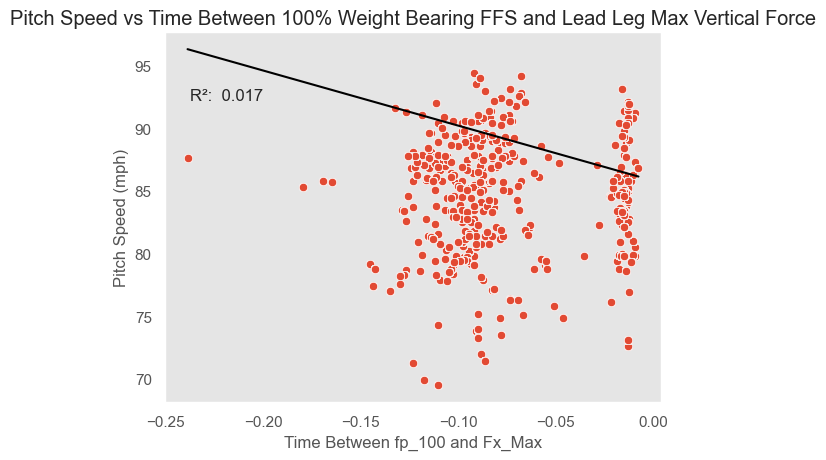

In [29]:
#set the style to 'ggplot'
plt.style.use('ggplot')

sns.scatterplot(x='delta_fx_max_fp_100', y='pitch_speed_mph_x', data=force_plate_csv_copy1)

#generate regression line values
reg_x = np.linspace(force_plate_csv_copy1['delta_fx_max_fp_100'].min(), force_plate_csv_copy1['delta_fx_max_fp_100'].max(), 100).reshape(-1, 1)
reg_y = model.predict(reg_x)

#plot the regression line
plt.plot(reg_x, reg_y, color='black')
plt.xlabel('Time Between fp_100 and Fx_Max')
plt.ylabel('Pitch Speed (mph)')
plt.title('Pitch Speed vs Time Between 100% Weight Bearing FFS and Lead Leg Max Vertical Force')

#adding R² value as text with adjusted position
text_x_position = 0.05  
text_y_position = 0.85  
r2_text = f'R²:  {model.score(X_test, y_test):.3f}'
plt.text(text_x_position, text_y_position, r2_text, transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

plt.grid(False)
          
plt.show()


### delta_fp_10_fp_100 and velocity

In [30]:
#check for any NaN values and handle them
force_plate_csv_copy2 = force_plate_csv_copy.dropna(subset=['delta_fp_10_fp_100', 'pitch_speed_mph_x'])

# Define the independent variable (X) and the dependent variable (y)
X2 = force_plate_csv_copy2[['delta_fp_10_fp_100']]  # Independent variable
y2 = force_plate_csv_copy2['pitch_speed_mph_x']       # Dependent variable


In [31]:
#create a linear regression model
model2 = LinearRegression()

#split the data into training and test sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=1)

#train the model
model2.fit(X_train2, y_train2)

LinearRegression()

In [32]:
#predictions using the testing set
y_pred2 = model2.predict(X_test2)


print('Coefficients:', model2.coef_)

print('Mean squared error:', mean_squared_error(y_test2, y_pred2))

print('Coefficient of determination (R^2):', r2_score(y_test2, y_pred2))

Coefficients: [-43.5827206]
Mean squared error: 21.337891373259936
Coefficient of determination (R^2): 0.01827131257899428


/Users/EmilioMartinez_1/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


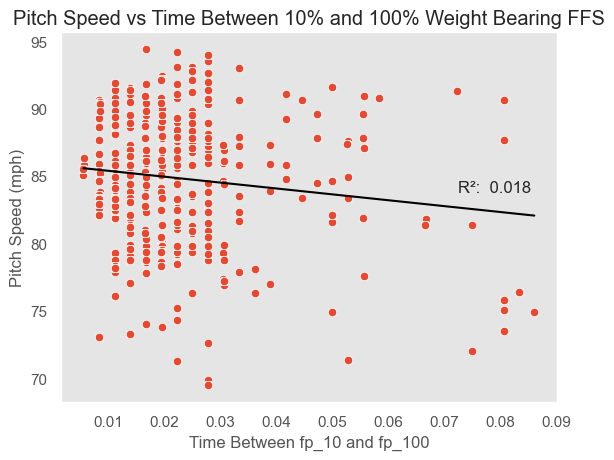

In [33]:
#set the style to 'ggplot'
plt.style.use('ggplot')

sns.scatterplot(x='delta_fp_10_fp_100', y='pitch_speed_mph_x', data=force_plate_csv_copy2)

#generate regression line values
reg_x2 = np.linspace(force_plate_csv_copy2['delta_fp_10_fp_100'].min(), force_plate_csv_copy2['delta_fp_10_fp_100'].max(), 100).reshape(-1, 1)
reg_y2 = model2.predict(reg_x2)

#plot the regression line
plt.plot(reg_x2, reg_y2, color='black')
plt.xlabel('Time Between fp_10 and fp_100')
plt.ylabel('Pitch Speed (mph)')
plt.title('Pitch Speed vs Time Between 10% and 100% Weight Bearing FFS')

#adding R² value as text with adjusted position
text_x_position = 0.8
text_y_position = 0.6 
r2_text = f'R²:  {model.score(X_test2, y_test2):.3f}'
plt.text(text_x_position, text_y_position, r2_text, transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

plt.grid(False)
          
plt.show()

### delta_MER_max_lead_fx and velocity

In [34]:
#check for any NaN values and handle them
force_plate_csv_copy3 = force_plate_csv_copy.dropna(subset=['delta_MER_max_lead_fx', 'pitch_speed_mph_x'])

# Define the independent variable (X) and the dependent variable (y)
X3 = force_plate_csv_copy3[['delta_MER_max_lead_fx']]  # Independent variable
y3 = force_plate_csv_copy3['pitch_speed_mph_x']       # Dependent variable


In [35]:
force_plate_csv_copy3.head()

,session_pitch,time,rear_force_x,rear_force_y,rear_force_z,lead_force_x,lead_force_y,lead_force_z,pkh_time,fp_10_time,fp_100_time,MER_time,BR_time,MIR_time,max_lead_fx_time,delta_fx_max_fp_100,delta_fp_10_fp_100,delta_MER_max_lead_fx,pitch_speed_mph_x,max_lead_force_x_x,pitch_speed_mph_y,max_lead_force_x_y
0,1031_2,0.0000,82.5463,-5.4519,581.2194,-0.2830,-0.2980,-0.7653,0.625,1.1806,1.1917,1.3056,1.3389,1.3778,1.3019,-0.1102,0.0111,0.0037,90.4,1278.4966,90.4,1278.4966
1,1031_2,0.0009,82.5354,-5.2039,578.6810,-0.3239,-0.2989,-0.7273,0.625,1.1806,1.1917,1.3056,1.3389,1.3778,1.3019,-0.1102,0.0111,0.0037,90.4,1278.4966,90.4,1278.4966
2,1031_2,0.0019,82.5264,-4.9488,576.0246,-0.3632,-0.2984,-0.6948,0.625,1.1806,1.1917,1.3056,1.3389,1.3778,1.3019,-0.1102,0.0111,0.0037,90.4,1278.4966,90.4,1278.4966
3,1031_2,0.0028,82.5200,-4.6900,573.2703,-0.4002,-0.2967,-0.6686,0.625,1.1806,1.1917,1.3056,1.3389,1.3778,1.3019,-0.1102,0.0111,0.0037,90.4,1278.4966,90.4,1278.4966
4,1031_2,0.0037,82.5173,-4.4309,570.4384,-0.4340,-0.2937,-0.6488,0.625,1.1806,1.1917,1.3056,1.3389,1.3778,1.3019,-0.1102,0.0111,0.0037,90.4,1278.4966,90.4,1278.4966


In [36]:
#create a linear regression model
model3 = LinearRegression()

#split the data into training and test sets
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.2, random_state=2)

#train the model
model3.fit(X_train3, y_train3)

LinearRegression()

In [37]:
#predictions using the testing set
y_pred3 = model3.predict(X_test3)


print('Coefficients:', model3.coef_)

print('Mean squared error:', mean_squared_error(y_test3, y_pred3))

print('Coefficient of determination (R^2):', r2_score(y_test3, y_pred3))

Coefficients: [-1.31047879]
Mean squared error: 21.936295833820868
Coefficient of determination (R^2): 0.00024572246732867953


/Users/EmilioMartinez_1/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


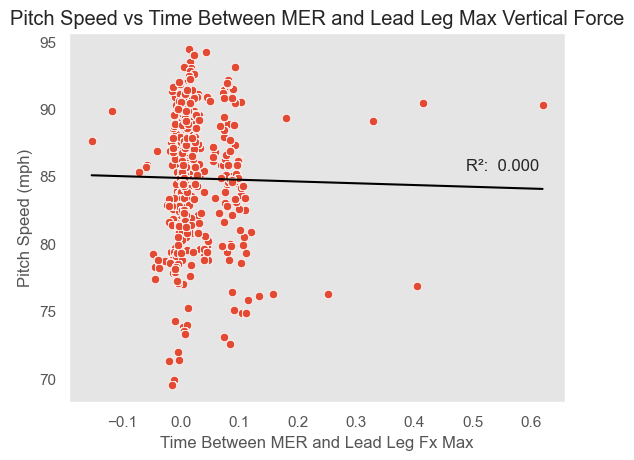

In [38]:
#set the style to 'ggplot'
plt.style.use('ggplot')

sns.scatterplot(x='delta_MER_max_lead_fx', y='pitch_speed_mph_x', data=force_plate_csv_copy3)

#generate regression line values
reg_x3 = np.linspace(force_plate_csv_copy3['delta_MER_max_lead_fx'].min(), force_plate_csv_copy3['delta_MER_max_lead_fx'].max(), 100).reshape(-1, 1)
reg_y3 = model3.predict(reg_x3)

#plot the regression line
plt.plot(reg_x3, reg_y3, color='black')
plt.xlabel('Time Between MER and Lead Leg Fx Max')
plt.ylabel('Pitch Speed (mph)')
plt.title('Pitch Speed vs Time Between MER and Lead Leg Max Vertical Force')

#adding R² value as text with adjusted position
text_x_position = 0.8
text_y_position = 0.66
r2_text = f'R²:  {model3.score(X_test3, y_test3):.3f}'
plt.text(text_x_position, text_y_position, r2_text, transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

plt.grid(False)
plt.show()

### max_lead_fx and velocity

In [44]:
#check for any NaN values and handle them
force_plate_csv_copy4 = force_plate_csv_copy.dropna(subset=['max_lead_force_x_x', 'pitch_speed_mph_x'])

# Define the independent variable (X) and the dependent variable (y)
X4 = force_plate_csv_copy4[['max_lead_force_x_x']]  # Independent variable
y4 = force_plate_csv_copy4['pitch_speed_mph_x']       # Dependent variable


In [45]:
#create a linear regression model
model4 = LinearRegression()

#split the data into training and test sets
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size=0.2, random_state=3)

#train the model
model4.fit(X_train4, y_train4)

LinearRegression()

In [46]:
#predictions using the testing set
y_pred4 = model4.predict(X_test4)


print('Coefficients:', model4.coef_)

print('Mean squared error:', mean_squared_error(y_test4, y_pred4))

print('Coefficient of determination (R^2):', r2_score(y_test4, y_pred4))

Coefficients: [0.00758387]
Mean squared error: 19.482873626253863
Coefficient of determination (R^2): 0.10489352257170315


/Users/EmilioMartinez_1/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


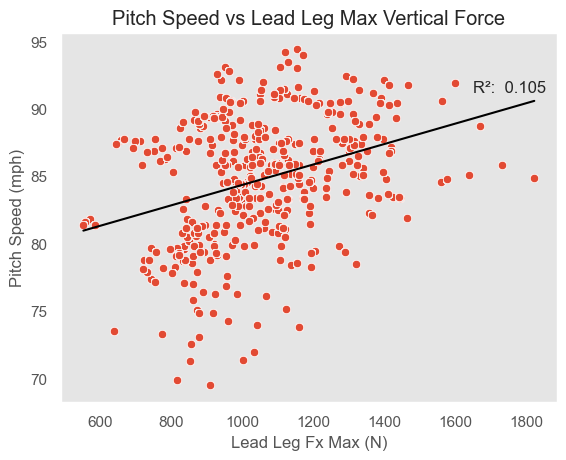

In [49]:
#set the style to 'ggplot'
plt.style.use('ggplot')

sns.scatterplot(x='max_lead_force_x_x', y='pitch_speed_mph_x', data=force_plate_csv_copy3)

#generate regression line values
reg_x4 = np.linspace(force_plate_csv_copy4['max_lead_force_x_x'].min(), force_plate_csv_copy4['max_lead_force_x_x'].max(), 100).reshape(-1, 1)
reg_y4 = model4.predict(reg_x4)

#plot the regression line
plt.plot(reg_x4, reg_y4, color='black')
plt.xlabel('Lead Leg Fx Max (N)')
plt.ylabel('Pitch Speed (mph)')
plt.title('Pitch Speed vs Lead Leg Max Vertical Force')

#adding R² value as text with adjusted position
text_x_position = 0.83
text_y_position = 0.87
r2_text = f'R²:  {model4.score(X_test4, y_test4):.3f}'
plt.text(text_x_position, text_y_position, r2_text, transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

plt.grid(False)
plt.show()